# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [2]:
# your code here
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [3]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family' , 'Health']

In [94]:
data = {
    'Date': [date for _ in range(8) for date in pd.date_range('2020-01-01', periods=500)],
    'Category': [category for category in categories for _ in range(500)],
    'Likes': np.random.randint(0, 1500000, size=4000),
    'Posts':np.random.randint(1, 11200, size=4000),
    'Shares':np.random.randint(0, 100, size=4000),
    'Reach': np.random.randint(100, 2000000, size=4000),
}
df = pd.DataFrame(data)

## Checking For Duplicated Values

In [95]:
df[df.duplicated()] # no duplicates

,Date,Category,Likes,Posts,Shares,Reach


### we Can notice the data has no duplicated values

## Checking For Null Values

In [96]:
df.isnull().sum() # No Null Values

Date        0
Category    0
Likes       0
Posts       0
Shares      0
Reach       0
dtype: int64

### We can See The Data Has No Null Values

## Checking For Incorrect Data Types

In [97]:
df.dtypes

Date        datetime64[ns]
Category            object
Likes                int64
Posts                int64
Shares               int64
Reach                int64
dtype: object

### All Data Types Are Correct

## A Closer Look At The Data

In [98]:
df.shape

(4000, 6)

In [99]:
df.head()

,Date,Category,Likes,Posts,Shares,Reach
0,2020-01-01,Food,81693,1236,31,951572
1,2020-01-02,Food,1105021,619,48,1061719
2,2020-01-03,Food,469216,7620,76,573685
3,2020-01-04,Food,612322,2924,90,776258
4,2020-01-05,Food,790792,617,45,850397


In [100]:
df[df['Reach'] < df['Likes']].head()

,Date,Category,Likes,Posts,Shares,Reach
1,2020-01-02,Food,1105021,619,48,1061719
5,2020-01-06,Food,399014,6595,43,172527
7,2020-01-08,Food,944719,7250,0,746014
8,2020-01-09,Food,767059,2528,2,495405
9,2020-01-10,Food,1028174,10896,64,562368


### We Notice Reach Amount is Lower Than The Amount of Likes in Entry 4, to fix that we need drop the rows with this incorrect value

In [101]:
for i in range(0, 4000):
    if df.loc[i, 'Reach'] < df.loc[i, 'Likes']:
        df.drop(i,inplace=True)

In [102]:
df[df['Reach'] < df['Likes']].head()

,Date,Category,Likes,Posts,Shares,Reach


# Now The Data Is Cleaned And Ready To be Analyzed

## Creating Proper Groub By Subset of the Dataframe For Better Visualization

In [49]:
grp = df.groupby('Category')['Likes'].mean().astype(int)

## Creating Line Chart To identify The Difference In Average Likes Between Categories

Text(0.5, 1.0, 'Categories By Average Likes')

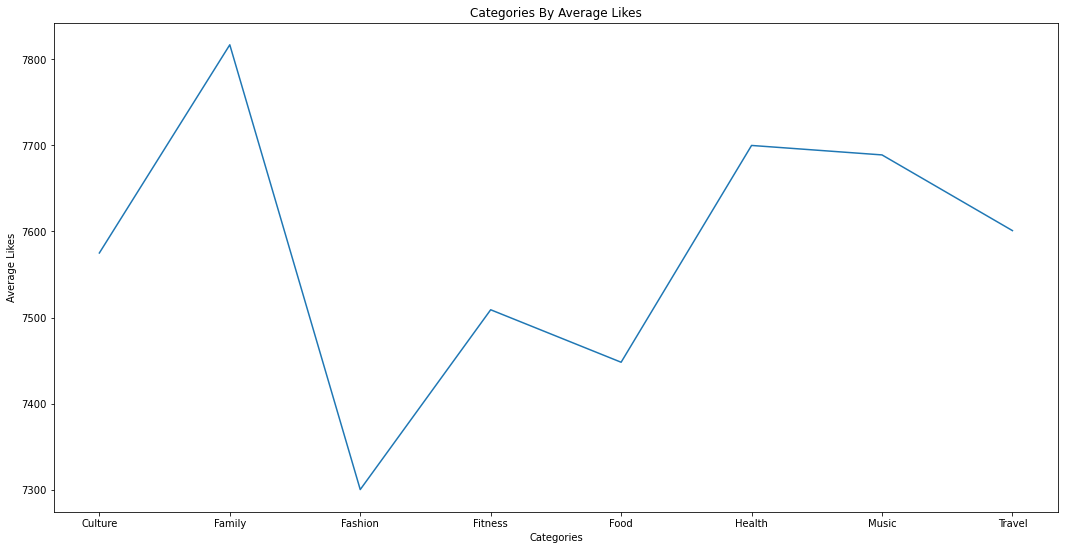

In [103]:
plt.figure(figsize=(18,9))
grp.plot(kind='line')
plt.xlabel("Categories")
plt.ylabel("Average Likes")
plt.title("Categories By Average Likes")

### Family Topic has the highest average likes

## Creating Bar plot to identify how Frequent each Category is discussed

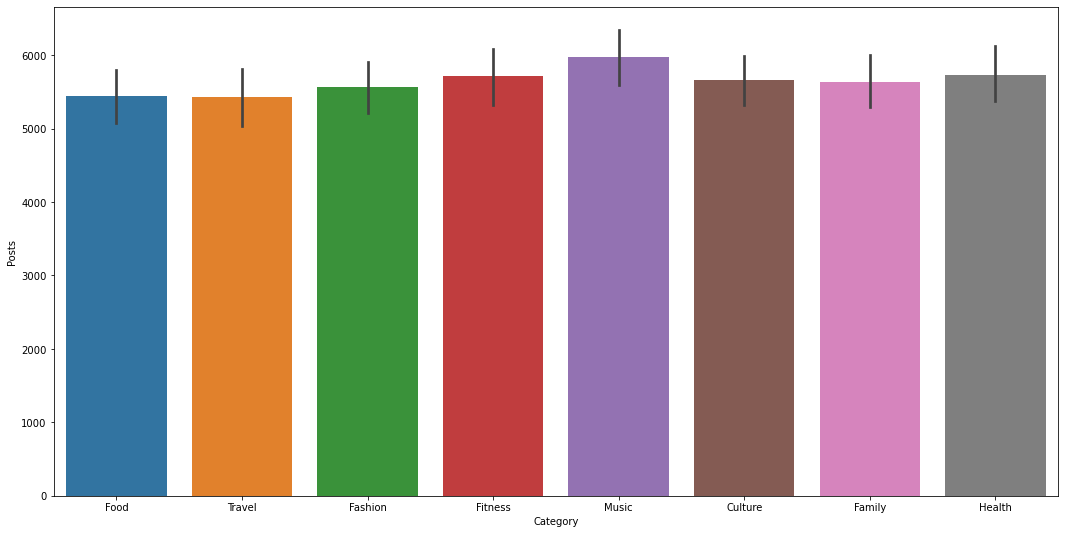

In [105]:
plt.figure(figsize=(18,9))
sns.barplot(data=df,y='Posts',x='Category')

### Music Category Has The Highest Amount of Posts Related

## Creating Boxplot To Identify The Outliers and the IQR 

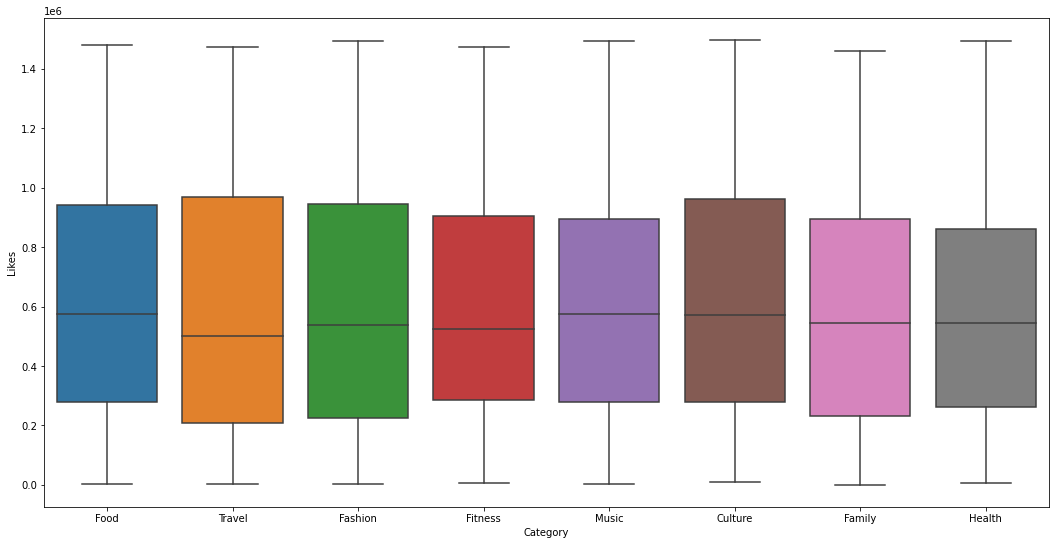

In [106]:
plt.figure(figsize=(18,9))
sns.boxplot(data=df,x="Category",y="Likes")

### Creating Seperate Year And Month Columns

In [134]:
df['Year'] = df['Date'].dt.strftime('%Y').astype(int)
df['Month'] = df['Date'].dt.strftime('%m')

In [143]:
new_grp = df.pib

,Date,Category,Likes,Posts,Shares,Reach,Year,Month
0,2020-01-01,Food,81693,1236,31,951572,2020,01
2,2020-01-03,Food,469216,7620,76,573685,2020,01
3,2020-01-04,Food,612322,2924,90,776258,2020,01
4,2020-01-05,Food,790792,617,45,850397,2020,01
6,2020-01-07,Food,1096356,4818,45,1384442,2020,01
...,...,...,...,...,...,...,...,...
3866,2021-01-01,Health,426579,3154,41,802929,2021,01
3867,2021-01-02,Health,1180317,5183,36,1405420,2021,01
3868,2021-01-03,Health,695829,5265,98,1935992,2021,01
3869,2021-01-04,Health,339084,9509,9,633091,2021,01


## Let's Find Out How Each Category Did Well According to Likes And Posts For The Time Provided

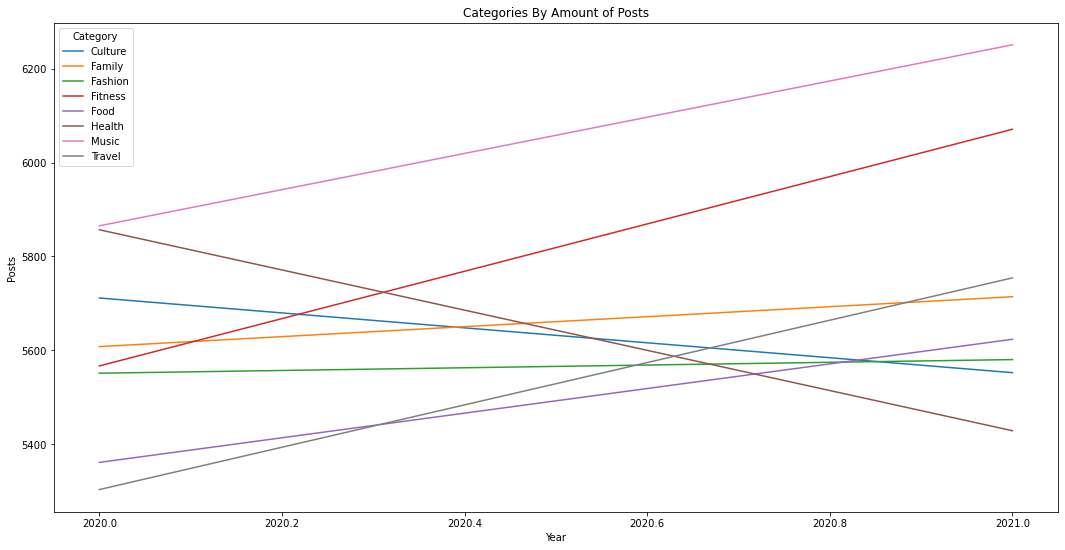

In [150]:
grouped_df = df.groupby('Category')

# Create a plot with separate lines for each category
fig, ax = plt.subplots(figsize=(18, 9))
for category, data in grouped_df:
    sns.lineplot(data=data, x='Year', y='Posts', label=category,ci=None, ax=ax)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Posts")
plt.title("Categories By Amount of Posts")
plt.legend(title="Category")

# Show the plot
plt.show()

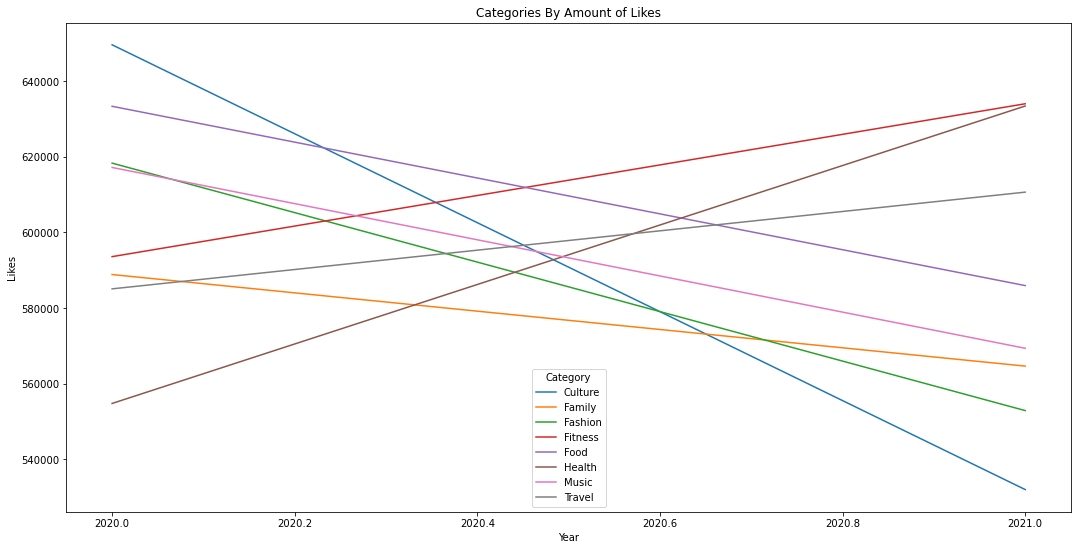

In [149]:
grouped_df = df.groupby('Category')

# Create a plot with separate lines for each category
fig, ax = plt.subplots(figsize=(18, 9))
for category, data in grouped_df:
    sns.lineplot(data=data, x='Year', y='Likes', label=category,ci=None, ax=ax)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Likes")
plt.title("Categories By Amount of Likes")
plt.legend(title="Category")

# Show the plot
plt.show()

### The Data Has No Outliers

In [107]:
df.describe()

,Likes,Posts,Shares,Reach
count,2.435000e+03,2435.000000,2435.000000,2.435000e+03
mean,6.000348e+05,5641.241068,49.163860,1.298046e+06
std,4.011095e+05,3262.865188,28.689879,4.661679e+05
min,7.420000e+02,6.000000,0.000000,5.906800e+04
25%,2.545635e+05,2823.500000,25.000000,9.643920e+05
50%,5.535470e+05,5661.000000,49.000000,1.357258e+06
75%,9.122145e+05,8498.000000,74.000000,1.694220e+06
max,1.497681e+06,11198.000000,99.000000,1.999723e+06


## Checking For Relation Between Numeric Values

In [108]:
df.corr()

,Likes,Posts,Shares,Reach
Likes,1.000000,0.010728,0.001919,0.421424
Posts,0.010728,1.000000,-0.034604,0.034949
Shares,0.001919,-0.034604,1.000000,0.025117
Reach,0.421424,0.034949,0.025117,1.000000


### we can see that The Amount of Reach Has A Small Relationship with The Amount Likes

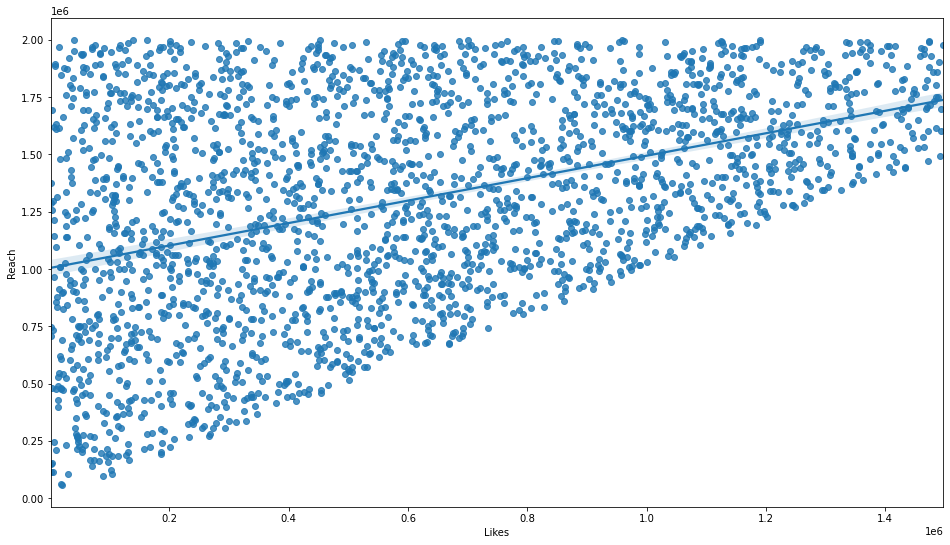

In [109]:
plt.figure(figsize=(16,9))
sns.regplot(data=df,x='Likes',y="Reach")

### As We Can See The Amount of Likes And Reach Have a potential Relationship in higher values

# let's Try and predict data using linear regression

In [124]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X= df[['Posts','Reach']]
Y= df['Likes']
lr.fit(X,Y)
Y_Hat= lr.predict(X)
r2_score = lr.score(X,Y)
r2_score

0.1776140248602759

### The R^2 score is so low that means the predictions won't be accurate

# Conclusion


### 1- Music Category Has The Highest Amount of Posts Related
### 2- Family Topic has the highest average likes
### 3- The Data Has No Relation Between Numeric Values
### 4- Culture, Fashion, Music, Food and family had a decrease in the total of likes through the years
### 5- Fitness, Travel and health had An Inecrease in the total of likes through the years
### 6- Health was the only category to have a decrease in the total amount of posts through the years



### Author

# Ahmed A. Elatwy

## Thank You For Your Time